**Relembrando o desafio...**

Você foi contratado(a) como cientista de dados pela operadora de telecomunicações **Alura Voz**. Na reunião inicial com as pessoas responsáveis pela área de vendas da empresa, foi explicada a importância de se **reduzir a Taxa de Evasão** de Clientes, conhecido como **Churn Rate**. Basicamente, o Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.

Com sua experiência, você sugere, como passo inicial, a identificação de clientes que teriam uma maior chance de deixar a empresa. Para isso, você explica que é interessante investigar algumas características de clientes ou dos planos de clientes para tentar **CLASSIFICAR** estas pessoas como potenciais candidatas a deixar a empresa ou não.

Assim, você solicita o conjunto de dados para começar a explorar, tratar e modelar a partir de agora. Em seguida, o foco será na otimização de cada um dos modelos com a finalidade de obter o melhor resultado para a tomada de decisão da **Alura Voz**. 

# Importando dados e bibliotecas

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import seaborn as sns
sns.color_palette("Paired")
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [44]:
# Paleta de cores
palette = {'undefined':'#CACACA','Indefinido':'#CACACA','Não':'#86BB6A','No':'#86BB6A','Sim':'#EF7A6E','Yes':'#EF7A6E', 'Sem churn':'#86BB6A','Com churn':'#EF7A6E'}
palette

{'undefined': '#CACACA',
 'Indefinido': '#CACACA',
 'Não': '#86BB6A',
 'No': '#86BB6A',
 'Sim': '#EF7A6E',
 'Yes': '#EF7A6E',
 'Sem churn': '#86BB6A',
 'Com churn': '#EF7A6E'}

In [2]:
dados = pd.read_csv('./data_churn_rate_processed.csv')
dados.head()

,id_cliente,churn,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte,streaming_tv,streaming_filmes,contrato,fatura_online,forma_pagamento,cobranca_diaria,cobranca_mensal,cobranca_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque por correio,2.19,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque por correio,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque por correio,2.80,83.9,267.40


# Análise exploratória dos dados

Inicialmente vamos explorar o nosso conjunto de dados tentando encontrar correlações entre nosso atributo classe (`churn`) e o restante das variáveis.

Além disso, também pode ser interessante analisar como as outras variáveis específicas se relacionam entre si.

## Frequência da variável churn

Não           71.198569
Sim           25.719004
Indefinido     3.082427
Name: churn, dtype: float64


Text(0.5, 1.0, 'Distribuição da variável churn')

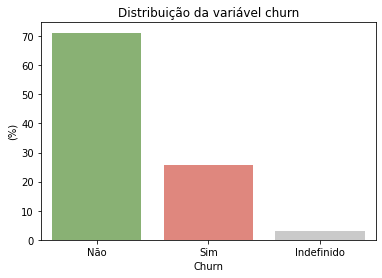

In [24]:
frequencia_churn = dados.churn.value_counts(normalize=True)*100
print(frequencia_churn)

fig = sns.barplot(x=frequencia_churn.index, y=frequencia_churn.values, palette=palette)
fig.set_ylabel('(%)')
fig.set_xlabel('Churn')
fig.set_title('Distribuição da variável churn')

Podemos verificar numericamente e visualmente que a grande maioria dos clientes (71%) não geraram **churn**, enquanto que aproximadamente 26% optaram pelo encerramento dos serviços.

Ainda assim pode-se considerar uma taxa de churn bastante alta, por isso nossa análise será importante para identificar as possíveis causas. Outros 3% estão com situação indefinida na variável `churn`

Agora vamos realizar uma série de análises entre `churn` e as outras variáveis do dataset, começando pelo **gênero** dos clientes

## Relação entre `churn` e dados pessoais categóricos (`genero`,`idoso`, `parceiro` e `dependentes`)

### Variável `churn` vs. `genero` e `idoso`

Primeiro vamos ver numericamente como está a distribuição das variáveis e sua relação com nosso atributo principal

In [11]:
from plotly.subplots import make_subplots

print('Variável "gênero"')
frequencia_genero = dados.genero.value_counts()
display(frequencia_genero)

cross_churn_genero = pd.crosstab(dados.churn, dados.genero, normalize='columns').reset_index()
# Cálculo da frequencia de churn por gênero em porcentagem
cross_churn_genero[['Feminino','Masculino']] = round(cross_churn_genero[['Feminino','Masculino']]*100,2)
print('Porcentagens')
display(cross_churn_genero)
print('\n')

print('Variável "idoso"')
frequencia_idoso = dados.idoso.value_counts()
frequencia_idoso.rename(index={'Não':'Nao_idoso','Sim':'Idoso'}, inplace=True)
display(frequencia_idoso)

cross_churn_idoso = pd.crosstab(dados.churn, dados.idoso, normalize='columns').reset_index()
cross_churn_idoso.rename(columns={'Não':'Nao_idoso','Sim':'Idoso'}, inplace=True)

# Cálculo da frequencia de churn por idade do cliente em porcentagem
cross_churn_idoso[['Nao_idoso','Idoso']] = round(cross_churn_idoso[['Nao_idoso','Idoso']]*100,2)
print('Porcentagens')
display(cross_churn_idoso)

Variável "gênero"


Masculino    3675
Feminino     3592
Name: genero, dtype: int64

Porcentagens


genero,churn,Feminino,Masculino
0,Indefinido,2.90,3.27
1,Não,70.96,71.43
2,Sim,26.14,25.31




Variável "idoso"


Nao_idoso    6085
Idoso        1182
Name: idoso, dtype: int64

Porcentagens


idoso,churn,Nao_idoso,Idoso
0,Indefinido,3.02,3.38
1,Não,74.08,56.35
2,Sim,22.89,40.27


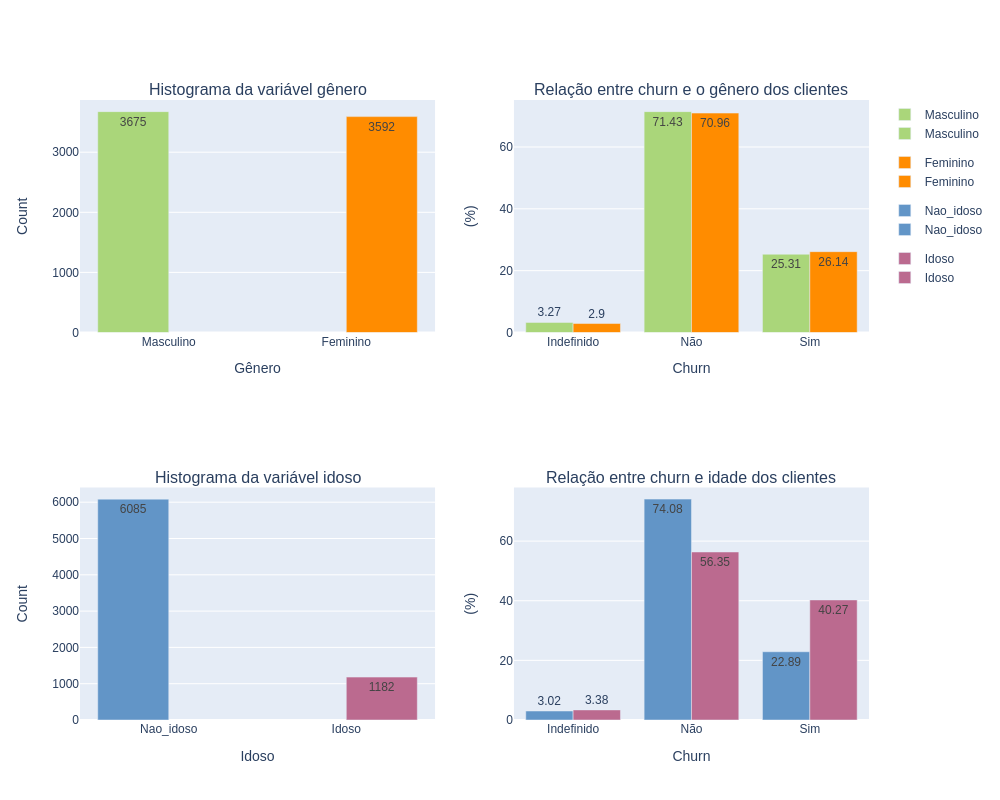

In [17]:
bar1 = px.bar(x=frequencia_genero.index, y=frequencia_genero.values, labels={'x':'gênero','y':'count'}, text_auto=True, color=frequencia_genero.index, color_discrete_sequence=['#AAD67A','darkorange'])

bar2 = px.bar(cross_churn_genero, x='churn', y=["Masculino","Feminino"], barmode='group', labels={'value':'count'}, text_auto=True, color_discrete_sequence=['#AAD67A','darkorange'])

bar3 = px.bar(x=frequencia_idoso.index, y=frequencia_idoso.values, labels={'x':'Idoso','y':'count'}, text_auto=True, color=frequencia_idoso.index, color_discrete_sequence=['#6295C7','#BB6A8F'])

bar4 = px.bar(cross_churn_idoso, x='churn', y=["Nao_idoso","Idoso"], barmode='group', labels={'value':'count'}, text_auto=True, color_discrete_sequence=['#6295C7','#BB6A8F'])

fig = make_subplots(rows=2, cols=2, subplot_titles=['Histograma da variável gênero',"Relação entre churn e o gênero dos clientes",'Histograma da variável idoso',"Relação entre churn e idade dos clientes"])
fig.append_trace(bar1['data'][0], row=1, col=1)
fig.append_trace(bar1['data'][1], row=1, col=1)

fig.append_trace(bar2['data'][0], row=1, col=2)
fig.append_trace(bar2['data'][1], row=1, col=2)

fig.append_trace(bar3['data'][0], row=2, col=1)
fig.append_trace(bar3['data'][1], row=2, col=1)

fig.append_trace(bar4['data'][0], row=2, col=2)
fig.append_trace(bar4['data'][1], row=2, col=2)

fig.update_xaxes(title_text='Gênero', row=1, col=1)
fig.update_xaxes(title_text='Churn', row=1, col=2)
fig.update_xaxes(title_text='Idoso', row=2, col=1)
fig.update_xaxes(title_text='Churn', row=2, col=2)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='(%)', row=1, col=2)
fig.update_yaxes(title_text='Count', row=2, col=1)
fig.update_yaxes(title_text='(%)', row=2, col=2)



fig.update_layout(
    height=800,
    width=1000
)

fig.show('png')

Com estes 4 gráficos, é possível tirar duas conclusões sobre nossos dados.

1º Não há uma relação clara entre a ocorrência de churn e o gênero das pessoas, já que a distribuição da frequência está semelhante nos dois casos. Isso pode indicar que o serviço está adequado para os diferentes perfis de cliente de acordo com o gênero.

2º A **churn rate** está proporcionalmente maior entre os clientes idosos (> 65 anos). Portanto há uma maior dificuldade de reter os clientes de mais idade, uma das causas pode ser a existência de problemas na acessibilidade dos produtos.

Uma análise ainda mais profunda pode ser feito nesse mesmo sentido, verificando o padrão de `churn` com relação às variáveis de gênero e idade **combinadas**

In [18]:
cross_genero_idade = pd.crosstab(dados.churn, [dados.genero,dados.idoso]).unstack().reset_index().rename(columns={0:'Count'})

# Criação de variável de porcentagem de ocorrência de churn, que será calculada separadamente para cada combinação entre as variáveis "genero" e "idoso"
cross_genero_idade = pd.crosstab(dados.churn, [dados.genero,dados.idoso], normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_genero_idade['percent'] = round(cross_genero_idade['percent']*100,2)

cross_genero_idade.idoso.replace({'Não':'Nao_idoso','Sim':'Idoso'}, inplace=True)
cross_genero_idade

,genero,idoso,churn,percent
0,Feminino,Nao_idoso,Indefinido,2.73
1,Feminino,Nao_idoso,Não,73.98
2,Feminino,Nao_idoso,Sim,23.28
3,Feminino,Idoso,Indefinido,3.73
4,Feminino,Idoso,Não,55.59
5,Feminino,Idoso,Sim,40.68
6,Masculino,Nao_idoso,Indefinido,3.31
7,Masculino,Nao_idoso,Não,74.18
8,Masculino,Nao_idoso,Sim,22.51
9,Masculino,Idoso,Indefinido,3.04


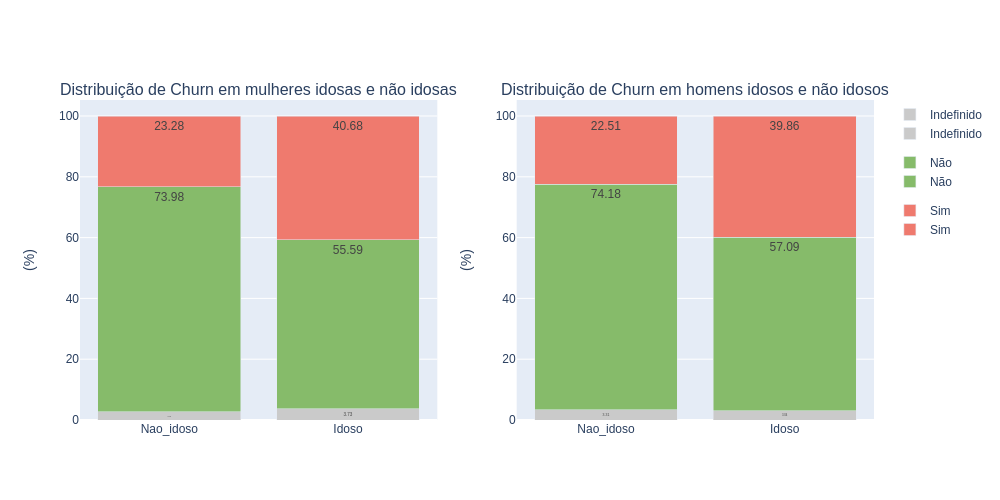

In [32]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Distribuição de Churn em mulheres idosas e não idosas','Distribuição de Churn em homens idosos e não idosos'])

bar1 = px.bar(x=cross_genero_idade.query('genero=="Feminino"')['idoso'],y=cross_genero_idade.query('genero=="Feminino"')['percent'], labels={'x':'Idoso', 'y':'percent'}, text_auto=True, color=cross_genero_idade.query('genero=="Feminino"')['churn'],
color_discrete_map=palette)
bar2 = px.bar(x=cross_genero_idade.query('genero=="Masculino"')['idoso'],y=cross_genero_idade.query('genero=="Masculino"')['percent'], labels={'x':'Idoso', 'y':'percent'}, text_auto=True, color=cross_genero_idade.query('genero=="Masculino"')['churn'],
color_discrete_map=palette)

fig.append_trace(bar1['data'][0], row=1, col=1)
fig.append_trace(bar1['data'][1], row=1, col=1)
fig.append_trace(bar1['data'][2], row=1, col=1)


fig.append_trace(bar2['data'][0], row=1, col=2)
fig.append_trace(bar2['data'][1], row=1, col=2)
fig.append_trace(bar2['data'][2], row=1, col=2)

fig.update_yaxes(title_text='(%)', row=1, col=1)
fig.update_yaxes(title_text='(%)', row=1, col=2)


fig.update_layout(width=1000 , height=500, barmode='stack')

fig.show('png')

Nesse caso vimos que a **churn rate** está similar entre mulheres e homens idosos;

Portanto agora temos mais confiança em dizer que a idade é um fator importante para ocorrência de churn, indiferente do gênero da pessoa.

### Variável `churn` vs. `parceiro` e `dependentes`

Nesta análise iremos prosseguir de maneira similar, observando como a ocorrência de 'churn' varia de acordo com os valores nas variáveis 'parceiro' e 'dependentes'

,parceiro,churn,percent
0,Sem parceiro,Indefinido,2.88
1,Sem parceiro,Não,65.11
2,Sem parceiro,Sim,32.01
3,Com parceiro,Indefinido,3.30
4,Com parceiro,Não,77.69
5,Com parceiro,Sim,19.02


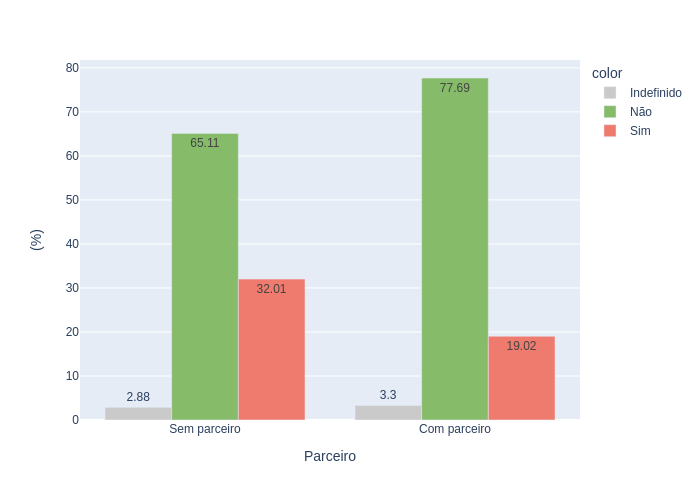

In [31]:
cross_churn_parceiro = pd.crosstab(dados.churn, dados.parceiro, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_parceiro['percent'] = round(cross_churn_parceiro['percent']*100,2)
cross_churn_parceiro.parceiro.replace({'Não':'Sem parceiro', 'Sim':'Com parceiro'}, inplace=True)

display(cross_churn_parceiro)

bar1 = px.bar(x=cross_churn_parceiro.parceiro,y=cross_churn_parceiro.percent, labels={'x':'Parceiro', 'y':'(%)'}, text_auto=True, color=cross_churn_parceiro.churn, barmode='group',
color_discrete_map=palette)

bar1.show('png')

,dependentes,churn,percent
0,Sem dependentes,Indefinido,3.01
1,Sem dependentes,Não,66.65
2,Sem dependentes,Sim,30.34
3,Com dependentes,Indefinido,3.26
4,Com dependentes,Não,81.80
5,Com dependentes,Sim,14.95


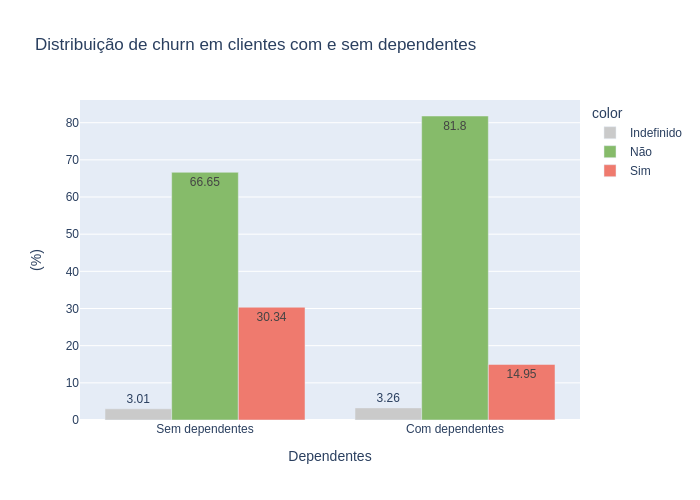

In [30]:
cross_churn_dependentes = pd.crosstab(dados.churn, dados.dependentes, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_dependentes['percent'] = round(cross_churn_dependentes['percent']*100,2)
cross_churn_dependentes.dependentes.replace({'Não':'Sem dependentes', 'Sim':'Com dependentes'}, inplace=True)

display(cross_churn_dependentes)

bar2 = px.bar(x=cross_churn_dependentes.dependentes,y=cross_churn_dependentes.percent, labels={'x':'Dependentes', 'y':'(%)'}, text_auto=True, color=cross_churn_dependentes.churn, barmode='group',
color_discrete_map=palette, title='Distribuição de churn em clientes com e sem dependentes')

bar2.show('png')

Neste caso, temos algumas constatações de certa forma inesperadas sobre nosso conjunto de dados. 

Em geral, há uma tendência dos consumidores **sem dependentes** e **sem parceiros** optarem pela descontinuidade dos serviços da **Alura Voz** em maior proporção do que os consumidores **com dependentes e parceiros**. Consumidores com dependentes e parceiros indicam mais pessoas consumindo os serviços e, portanto, contratação de planos mais caros, o que poderia ocasionar um maior churn, mas não é isso que nosso dados mostram.

Nossos dados indicam que há uma maior taxa de churn nos clientes sem dependentes e sem parceiros (provavelmente pessoas solteiras). Uma interpretação possível é que pessoas solteiras tendem a ser mais jovens e não possuem grande estabilidade financeira, desta forma pequenas variações nos preços e qualidade dos serviços prestados já são suficientes para aumentar a taxa de churn nesse grupo de pessoas.

## Relação entre `churn` e outras variáveis categóricas

Nesta seção vamos finalizar a análise da ocorrência de churn com os atributos categóricos restantes, os quais descrevem as características do serviço contratado e também de "infraestrutura" por parte do cliente. 

Assim poderemos identificar se o churn está relacionado à contratação de algum serviço específico prestado pela **Alura Voz**.

### Variável `churn` vs. `servico_telefone`, `multiplas_linhas`, `servico_internet`

Devido à uma certa redundância de informações no nosso *dataset*, podemos descartar a avaliação individual da variável 'servico_telefone', já que na variável 'multiplas_linhas' podemos obter as mesmas informações.

'servico_telefone' / 'multiplas_linhas'

**No** = **No phone service**

**Yes** = [**No**, **Yes**]

In [11]:
print(dados.multiplas_linhas.unique())
print(dados.servico_telefone.unique())

print(dados.servico_telefone.value_counts())

# Distrubição de churn com relação às características de telefonia dos usuários
cross_churn_multiplas_linhas = pd.crosstab(dados.churn, dados.multiplas_linhas, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_multiplas_linhas.percent = round(cross_churn_multiplas_linhas.percent * 100, 2)
print('Variável "multiplas_linhas"')
display(cross_churn_multiplas_linhas)

['Não' 'Sim' 'Sem serviço telefônico']
['Sim' 'Não']
Sim    6560
Não     707
Name: servico_telefone, dtype: int64
Variável "multiplas_linhas"


,multiplas_linhas,churn,percent
0,Não,Indefinido,3.00
1,Não,Não,72.70
2,Não,Sim,24.29
3,Sem serviço telefônico,Indefinido,3.54
4,Sem serviço telefônico,Não,72.42
5,Sem serviço telefônico,Sim,24.05
6,Sim,Indefinido,3.07
7,Sim,Não,69.20
8,Sim,Sim,27.73


Vimos que o churn está seguindo basicamente a mesma distribuição nas três classes da variável `multiplas_linhas`, portanto é possível afirmar que não há relação entre a ocorrência de `churn` e as variáveis `multiplas_linhas` e `servico_telefone`

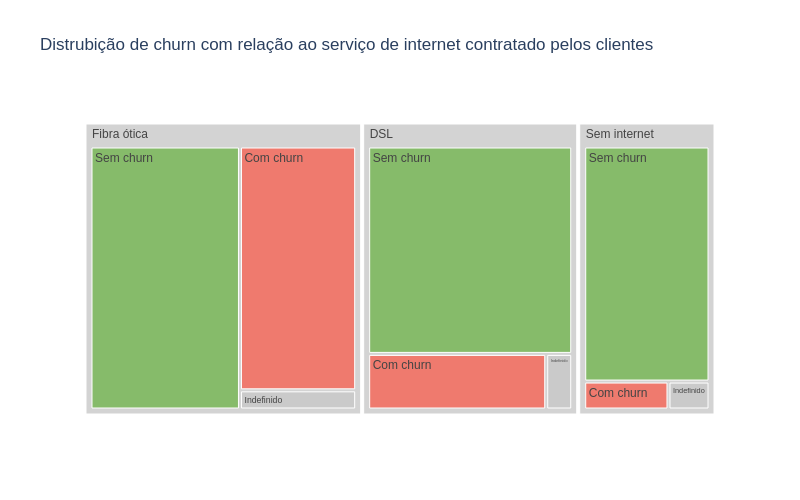

In [36]:
# Distrubição de churn com relação ao serviço de internet contratado pelos clientes
cross_churn_internet = pd.crosstab(dados.churn, dados.servico_internet).unstack().reset_index().rename(columns={0:'count'})
cross_churn_internet.churn.replace({'Não':'Sem churn', 'Sim':'Com churn'}, inplace=True)
cross_churn_internet.servico_internet.replace({'Não':'Sem internet'}, inplace=True)


treemap = px.treemap(cross_churn_internet, path=['servico_internet','churn'], values='count', color='churn', color_discrete_map={'(?)':'lightgrey','Com churn':'#EF7A6E','Sem churn':'#86BB6A','Indefinido':'#CACACA'}, title="Distrubição de churn com relação ao serviço de internet contratado pelos clientes")
treemap.update_layout({'width':800})
treemap.show('png')

Variável "servico_internet"


,servico_internet,churn,percent
0,DSL,Indefinido,2.69
1,DSL,Não,78.86
2,DSL,Sim,18.45
3,Fibra ótica,Indefinido,3.19
4,Fibra ótica,Não,56.25
5,Fibra ótica,Sim,40.56
6,Não,Indefinido,3.48
7,Não,Não,89.37
8,Não,Sim,7.15


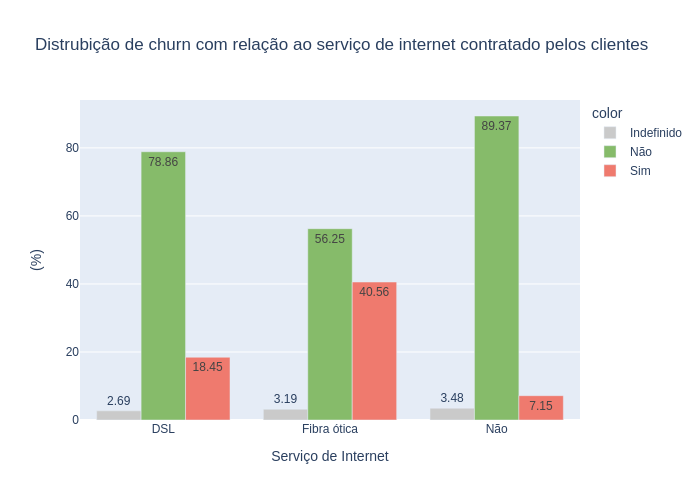

In [37]:
# Distrubição de churn com relação ao serviço de internet contratado pelos clientes
cross_churn_internet = pd.crosstab(dados.churn, dados.servico_internet, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_internet.percent = round(cross_churn_internet.percent * 100, 2)
print('Variável "servico_internet"')
display(cross_churn_internet)

bar = px.bar(x=cross_churn_internet.servico_internet,y=cross_churn_internet.percent, labels={'x':'Serviço de Internet', 'y':'(%)'}, text_auto=True, color=cross_churn_internet.churn, barmode='group',
color_discrete_map=palette, title="Distrubição de churn com relação ao serviço de internet contratado pelos clientes")

bar.show('png')

Já no caso do serviço de internet, fica claro que proporcionalmente ocorre mais churn nos clientes que utilizam **fibra ótica**.

Curiosamente, fibra óptica é considerada uma tecnologia muito superior à DSL. Uma hipótese a ser levantada é que a fibra ótica oferecida pela **Alura Voz** não está agradando os usuários.

Outro ponto interessante é a tendência de ocorrer menos churn entre clientes sem serviço de internet. Isso representa um ponto positivo para o serviços da **Alura Voz**, que pode indicar uma boa qualidade dos serviços apenas de telefonia.

Podemos tentar confirmar as suposições acima com uma nova análise, comparando como a taxa de churn de acordo com as possíveis combinações de serviços de telefonia e internet.

,servico_telefone,servico_internet,churn,percent
0,Sem telefone,DSL,Indefinido,3.54
1,Sem telefone,DSL,Sem churn,72.42
2,Sem telefone,DSL,Com churn,24.05
3,Com telefone,DSL,Indefinido,2.36
4,Com telefone,DSL,Sem churn,81.41
5,Com telefone,DSL,Com churn,16.23
6,Com telefone,Fibra ótica,Indefinido,3.19
7,Com telefone,Fibra ótica,Sem churn,56.25
8,Com telefone,Fibra ótica,Com churn,40.56
9,Com telefone,Sem internet,Indefinido,3.48


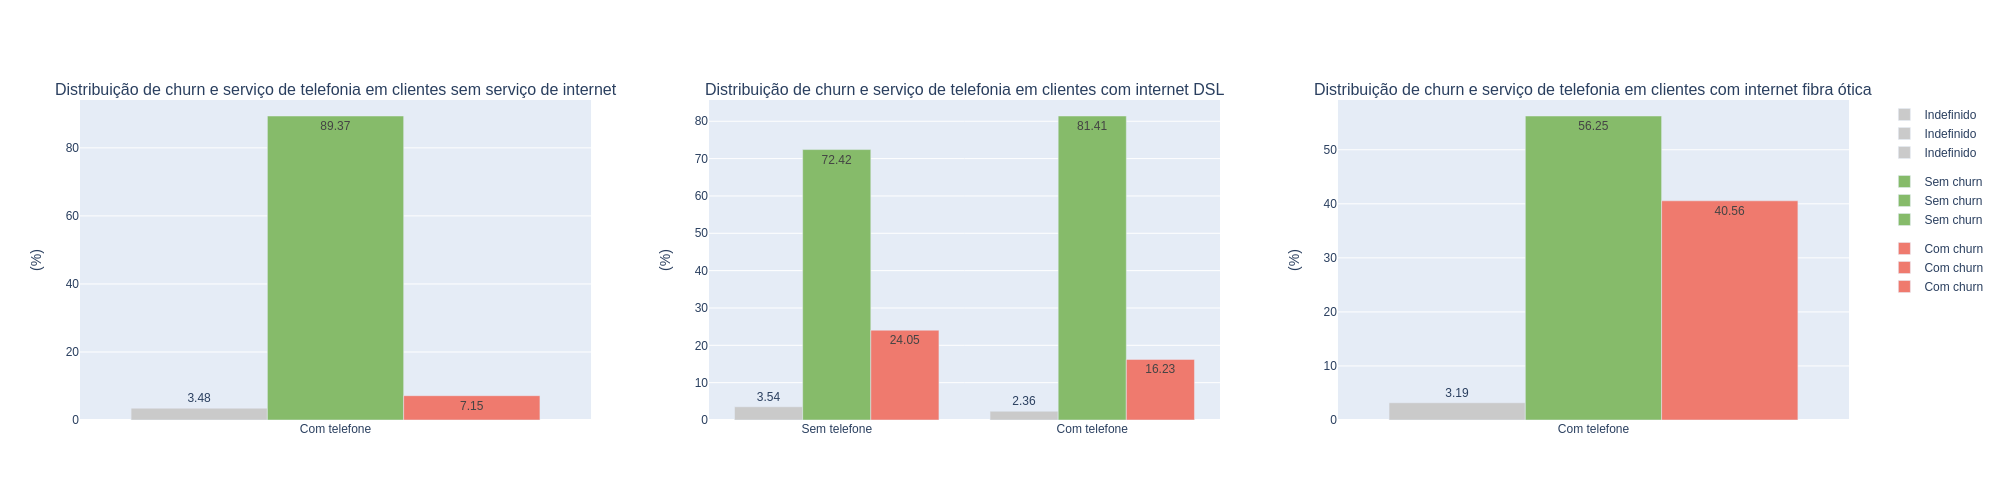

In [46]:
cross_internet_telefonia = pd.crosstab(dados.churn, [dados.servico_telefone,dados.servico_internet], normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_internet_telefonia['percent'] = round(cross_internet_telefonia['percent']*100,2)
cross_internet_telefonia.servico_telefone.replace({'Não':'Sem telefone', 'Sim':'Com telefone'}, inplace=True)
cross_internet_telefonia.servico_internet.replace({'Não':'Sem internet'}, inplace=True)
cross_internet_telefonia.churn.replace({'Não':'Sem churn', 'Sim':'Com churn'}, inplace=True)

display(cross_internet_telefonia)

fig = make_subplots(rows=1, cols=3, subplot_titles=['Distribuição de churn e serviço de telefonia em clientes sem serviço de internet',
'Distribuição de churn e serviço de telefonia em clientes com internet DSL','Distribuição de churn e serviço de telefonia em clientes com internet fibra ótica'])

df_fig1 = cross_internet_telefonia.query('servico_internet=="Sem internet"')
df_fig2 = cross_internet_telefonia.query('servico_internet=="DSL"')
df_fig3 = cross_internet_telefonia.query('servico_internet=="Fibra ótica"')

fig1 = px.bar(x=df_fig1['servico_telefone'],y=df_fig1['percent'],text_auto=True, color=df_fig1['churn'], color_discrete_map=palette)
fig2 = px.bar(x=df_fig2['servico_telefone'],y=df_fig2['percent'],text_auto=True, color=df_fig2['churn'], color_discrete_map=palette)
fig3 = px.bar(x=df_fig3['servico_telefone'],y=df_fig3['percent'],text_auto=True, color=df_fig3['churn'], color_discrete_map=palette)


for i in range(len(fig1.data)):
    fig.append_trace(fig1['data'][i], row=1, col=1)
    fig.append_trace(fig2['data'][i], row=1, col=2)
    fig.append_trace(fig3['data'][i], row=1, col=3)

fig.update_layout({'width':2000, })
fig.update_yaxes(title_text='(%)')

fig.show('png')

De certa forma, o segundo gráfico acima ajuda a sustentar a hipótese de que o serviço de telefonia é de boa qualidade, pois nos clientes que possuem internet DSL houve menor taxa de churn nos clientes que também haviam contratado serviços de telefonia.

Infelizmente essa comparação não pôde ser feita nos clientes sem internet ou com internet fibra ótica, o que incrementaria ainda mais nossa análise.

Por outro lado, o terceiro gráfico também deixa claro que, mesmo contratando serviços de telefonia, os clientes usuários de fibra ótica parecem descontentes com a qualidade do serviço.

### Variável `churn` vs. `seguranca_online`, `protecao_dispositivo`, `suporte`, `backup_online`

Agora vamos trabalhar com outras três variáveis que de certa forma estão relacionadas, pois indicam preferências de segurança e suporte por parte do usuário

Não                        3608
Sim                        2078
Sem serviço de internet    1581
Name: seguranca_online, dtype: int64
Variável "seguranca_online"


,seguranca_online,churn,percent
0,Não,Indefinido,3.05
1,Não,Sem churn,56.46
2,Não,Com churn,40.49
3,Sem serviço de internet,Indefinido,3.48
4,Sem serviço de internet,Sem churn,89.37
5,Sem serviço de internet,Com churn,7.15
6,Sim,Indefinido,2.84
7,Sim,Sem churn,82.96
8,Sim,Com churn,14.20


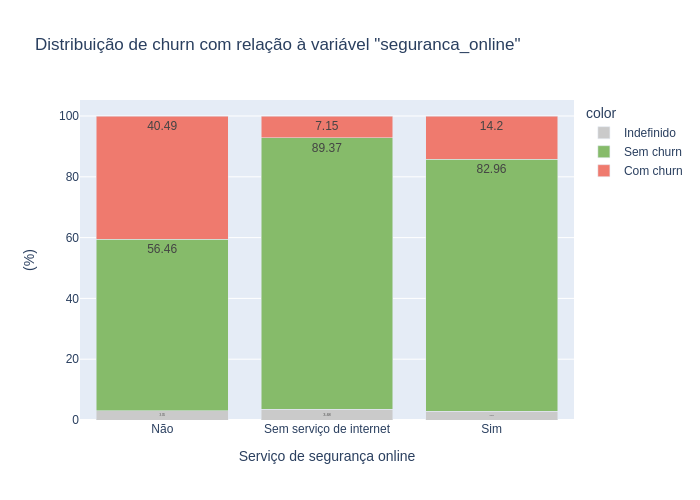

In [45]:
# Distrubição de churn com relação aos serviços de segurança online contratados pelos usuários
print(dados.seguranca_online.value_counts())

cross_churn_seguranca_online = pd.crosstab(dados.churn, dados.seguranca_online, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_seguranca_online.percent = round(cross_churn_seguranca_online.percent * 100, 2)

cross_churn_seguranca_online.seguranca_online.replace({'No':'Não utiliza', 'No internet service':'Sem internet','Yes':'Utiliza'}, inplace=True)
cross_churn_seguranca_online.churn.replace({'Não':'Sem churn', 'Sim':'Com churn'}, inplace=True)

print('Variável "seguranca_online"')
display(cross_churn_seguranca_online)

bar = px.bar(x=cross_churn_seguranca_online.seguranca_online,y=cross_churn_seguranca_online.percent, labels={'x':'Serviço de segurança online', 'y':'(%)'}, text_auto=True, color=cross_churn_seguranca_online.churn, barmode='stack',
color_discrete_map=palette, title='Distribuição de churn com relação à variável "seguranca_online"')

bar.show('png')

Portanto clientes que não contrataram o serviço de segurança online apresentaram proporcionalmente uma maior taxa de **churn**

Não                        3195
Sim                        2491
Sem serviço de internet    1581
Name: protecao_dispositivo, dtype: int64
Variável "protecao_dispositivo"


,protecao_dispositivo,churn,percent
0,Não,Indefinido,3.13
1,Não,Sem churn,58.97
2,Não,Com churn,37.90
3,Sem serviço de internet,Indefinido,3.48
4,Sem serviço de internet,Sem churn,89.37
5,Sem serviço de internet,Com churn,7.15
6,Sim,Indefinido,2.77
7,Sim,Sem churn,75.35
8,Sim,Com churn,21.88


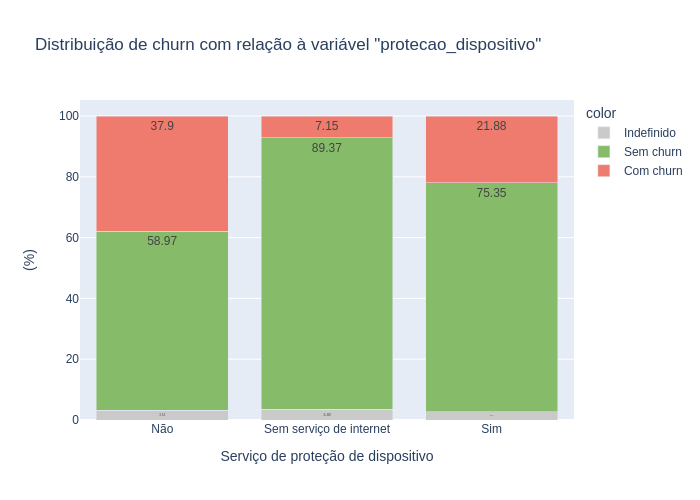

In [47]:
# Distrubição de churn com relação aos serviços de proteção de dispositivo contratados pelos usuários
print(dados.protecao_dispositivo.value_counts())

cross_churn_protecao_dispositivo = pd.crosstab(dados.churn, dados.protecao_dispositivo, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_protecao_dispositivo.percent = round(cross_churn_protecao_dispositivo.percent * 100, 2)

cross_churn_protecao_dispositivo.protecao_dispositivo.replace({'No':'Não utiliza', 'No internet service':'Sem internet','Yes':'Utiliza'}, inplace=True)
cross_churn_protecao_dispositivo.churn.replace({'Não':'Sem churn', 'Sim':'Com churn'}, inplace=True)

print('Variável "protecao_dispositivo"')
display(cross_churn_protecao_dispositivo)

bar = px.bar(x=cross_churn_protecao_dispositivo.protecao_dispositivo,y=cross_churn_protecao_dispositivo.percent, labels={'x':'Serviço de proteção de dispositivo', 'y':'(%)'}, text_auto=True, color=cross_churn_protecao_dispositivo.churn, barmode='stack',
color_discrete_map=palette, title='Distribuição de churn com relação à variável "protecao_dispositivo"')

bar.show('png')

Novamente os dados indicam que usuários que contratam os serviços adicionais de segurança estão mais satisfeitos com os serviços, ocorrendo menos churn proporcionalmente.

In [17]:
# Distrubição de churn com relação aos serviços de suporte
print('Variável "suporte"')
print(dados.suporte.value_counts())

cross_churn_suporte = pd.crosstab(dados.churn, dados.suporte, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_suporte.percent = round(cross_churn_suporte.percent * 100, 2)

cross_churn_suporte.suporte.replace({'Não':'Não utiliza', 'Sim':'Utiliza'}, inplace=True)
cross_churn_suporte.churn.replace({'Não':'Sem churn', 'Sim':'Com churn'}, inplace=True)

display(cross_churn_suporte)
print('\n')

# Distrubição de churn com relação aos serviços de backup online
print('Variável "backup_online"')

print(dados.backup_online.value_counts())

cross_churn_backup_online = pd.crosstab(dados.churn, dados.backup_online, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_backup_online.percent = round(cross_churn_backup_online.percent * 100, 2)

cross_churn_backup_online.backup_online.replace({'Não':'Não utiliza', 'Sim':'Utiliza'}, inplace=True)
cross_churn_backup_online.churn.replace({'Não':'Sem churn', 'Sim':'Com churn'}, inplace=True)

print('Variável "backup_online"')
display(cross_churn_backup_online)

Variável "suporte"
Não                        3582
Sim                        2104
Sem serviço de internet    1581
Name: suporte, dtype: int64


,suporte,churn,percent
0,Não utiliza,Indefinido,3.04
1,Não utiliza,Sem churn,56.59
2,Não utiliza,Com churn,40.37
3,Sem serviço de internet,Indefinido,3.48
4,Sem serviço de internet,Sem churn,89.37
5,Sem serviço de internet,Com churn,7.15
6,Utiliza,Indefinido,2.85
7,Utiliza,Sem churn,82.41
8,Utiliza,Com churn,14.73




Variável "backup_online"
Não                        3182
Sim                        2504
Sem serviço de internet    1581
Name: backup_online, dtype: int64
Variável "backup_online"


,backup_online,churn,percent
0,Não utiliza,Indefinido,2.95
1,Não utiliza,Sem churn,58.30
2,Não utiliza,Com churn,38.75
3,Sem serviço de internet,Indefinido,3.48
4,Sem serviço de internet,Sem churn,89.37
5,Sem serviço de internet,Com churn,7.15
6,Utiliza,Indefinido,3.00
7,Utiliza,Sem churn,76.12
8,Utiliza,Com churn,20.89


Percebe-se que o mesmo padrão se repete nos serviços adicionais de backup e suporte preferencial. 

Assim, podemos concluir que os serviços adicionais da **Alura Voz** estão agradando os clientes contratantes. Uma boa opção para reduzir o **churn** na empresa seria um maior investimento em estratégias para aumentar a adesão dos serviços adicionais.

### Variável `churn` vs. `contrato`, `forma_pagamento`, `fatura_online`

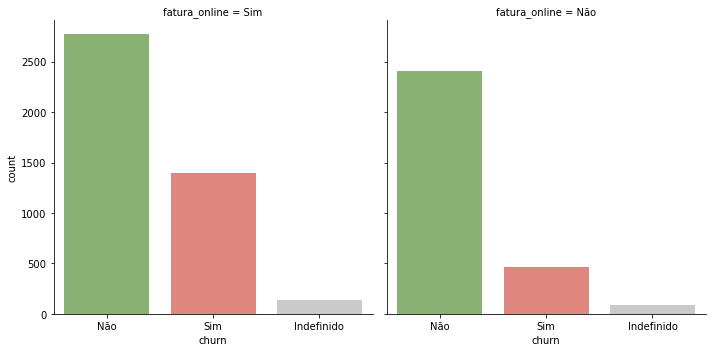

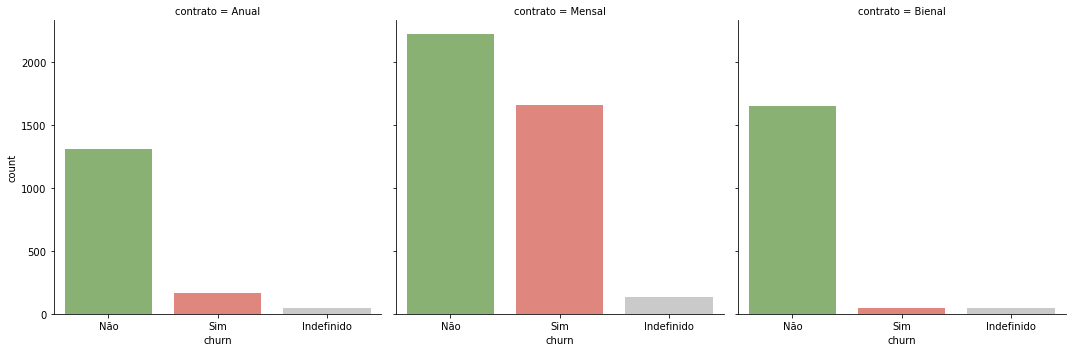

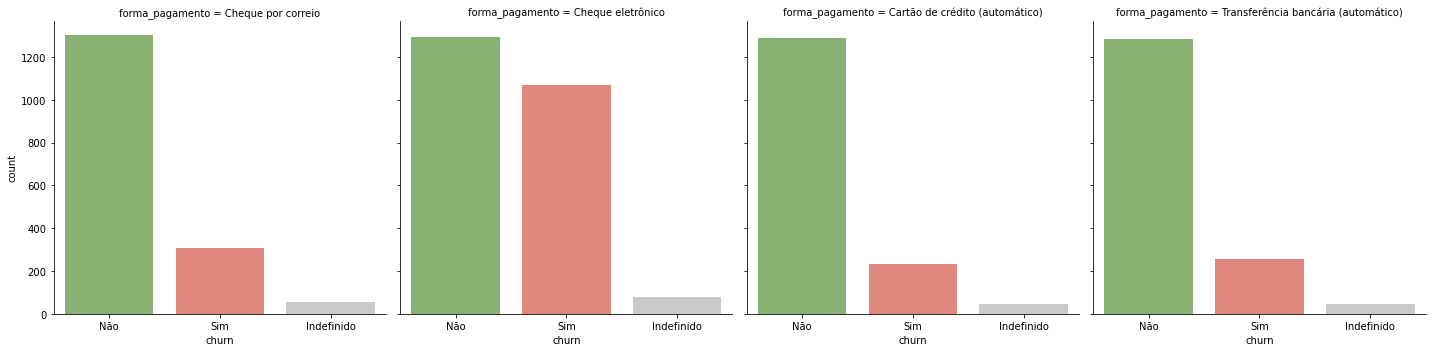

In [48]:
cols = ['fatura_online','contrato','forma_pagamento']

for col in cols:
    sns.catplot(data=dados, x='churn', col=col, kind='count', palette=palette)

Com os gráficos destas três variáveis, foi possível perceber que a taxa de churn é maior entre os clientes que optaram por receber fatura online. 

Esse padrão também é observado entre clientes que pagam a assinatura por cheque eletrônico e entre clientes com contratos mensais de assinatura

### Variável `churn` vs. `streaming_tv`, `streaming_filmes`

Vamos analisar agora como a taxa de churn varia entre os usuários que assinaram ou não serviços de streaming da Alura Voz

In [49]:
# Distrubição de churn com relação ao serviço de streaming de TV
print('Variável "streaming_tv"')
print(dados.streaming_tv.value_counts())

cross_churn_streaming_tv = pd.crosstab(dados.churn, dados.streaming_tv, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_streaming_tv.percent = round(cross_churn_streaming_tv.percent * 100, 2)

cross_churn_streaming_tv.streaming_tv.replace({'Não':'Não utiliza', 'Sim':'Utiliza'}, inplace=True)
cross_churn_streaming_tv.churn.replace({'Não':'Sem churn', 'Sim':'Com churn'}, inplace=True)

display(cross_churn_streaming_tv)

Variável "streaming_tv"
Não                        2896
Sim                        2790
Sem serviço de internet    1581
Name: streaming_tv, dtype: int64


,streaming_tv,churn,percent
0,Não utiliza,Indefinido,2.97
1,Não utiliza,Sem churn,64.50
2,Não utiliza,Com churn,32.53
3,Sem serviço de internet,Indefinido,3.48
4,Sem serviço de internet,Sem churn,89.37
5,Sem serviço de internet,Com churn,7.15
6,Utiliza,Indefinido,2.97
7,Utiliza,Sem churn,67.85
8,Utiliza,Com churn,29.18


In [50]:
# Distrubição de churn com relação ao serviço de streaming de filmes
print('Variável "streaming_filmes"')
print(dados.streaming_filmes.value_counts())

cross_churn_streaming_filmes = pd.crosstab(dados.churn, dados.streaming_filmes, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_streaming_filmes.percent = round(cross_churn_streaming_filmes.percent * 100, 2)

cross_churn_streaming_filmes.streaming_filmes.replace({'Não':'Não utiliza', 'Sim':'Utiliza'}, inplace=True)
cross_churn_streaming_filmes.churn.replace({'Não':'Sem churn', 'Sim':'Com churn'}, inplace=True)

display(cross_churn_streaming_filmes)

Variável "streaming_filmes"
Não                        2870
Sim                        2816
Sem serviço de internet    1581
Name: streaming_filmes, dtype: int64


,streaming_filmes,churn,percent
0,Não utiliza,Indefinido,2.96
1,Não utiliza,Sem churn,64.36
2,Não utiliza,Com churn,32.68
3,Sem serviço de internet,Indefinido,3.48
4,Sem serviço de internet,Sem churn,89.37
5,Sem serviço de internet,Com churn,7.15
6,Utiliza,Indefinido,2.98
7,Utiliza,Sem churn,67.97
8,Utiliza,Com churn,29.05


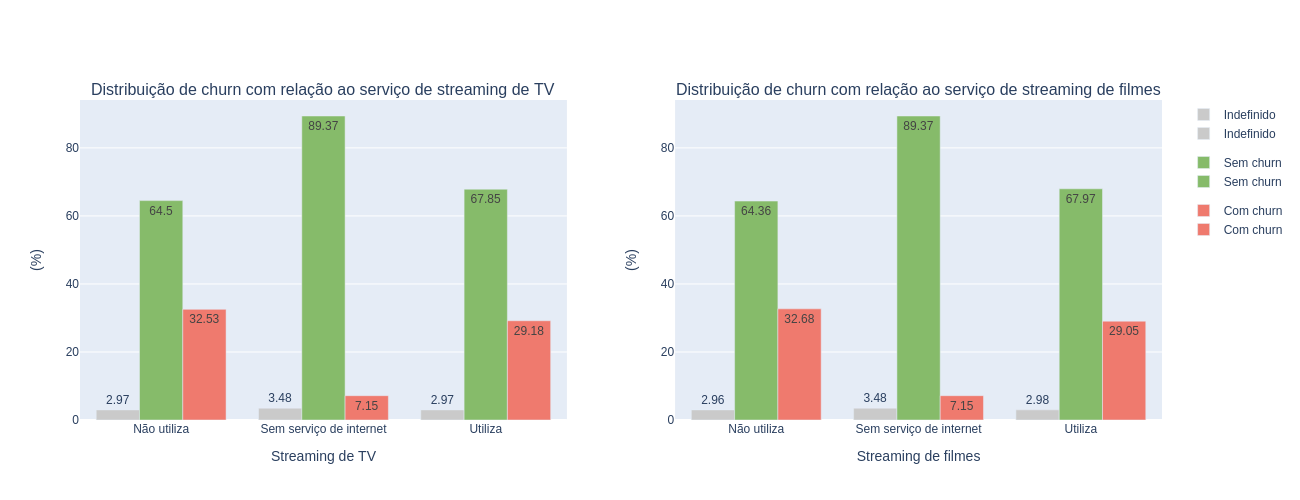

In [52]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Distribuição de churn com relação ao serviço de streaming de TV','Distribuição de churn com relação ao serviço de streaming de filmes'])

fig1 = px.bar(x=cross_churn_streaming_tv['streaming_tv'],y=cross_churn_streaming_tv['percent'],text_auto=True, color=cross_churn_streaming_tv['churn'], color_discrete_map=palette)
fig2 = px.bar(x=cross_churn_streaming_filmes['streaming_filmes'],y=cross_churn_streaming_filmes['percent'],text_auto=True, color=cross_churn_streaming_filmes['churn'], color_discrete_map=palette)

for i in range(len(fig1.data)):
    fig.append_trace(fig1['data'][i], row=1, col=1)
    fig.append_trace(fig2['data'][i], row=1, col=2)
fig.update_layout({'width':1300})
fig.update_yaxes(title_text='(%)')
fig.update_xaxes(title_text='Streaming de TV', row=1, col=1)
fig.update_xaxes(title_text='Streaming de filmes', row=1, col=2)
fig.show('png')

Com relação aos serviços de streaming da **Alura Voz**, não é perceptível nenhum padrão nos dados, pois a taxa de churn é similar em clientes que assinaram os serviços e aqueles que não assinaram.

## Distribuição de `churn` com relação às variáveis numéricas

Nesta nova seção da nossa análise exploratória, vamos verificar como a taxa de churn se comporta de acordo com as variáveis numéricas existentes no nosso dataset

In [53]:
import numpy as np

In [54]:
print(dados.select_dtypes(exclude=[object]))

      meses_contrato  cobranca_diaria  cobranca_mensal  cobranca_total
0                  9             2.19            65.60          593.30
1                  9             2.00            59.90          542.40
2                  4             2.46            73.90          280.85
3                 13             3.27            98.00         1237.85
4                  3             2.80            83.90          267.40
...              ...              ...              ...             ...
7262              13             1.84            55.15          742.90
7263              22             2.84            85.10         1873.70
7264               2             1.68            50.30           92.75
7265              67             2.26            67.85         4627.65
7266              63             1.97            59.00         3707.60

[7267 rows x 4 columns]


### Variável `churn` vs. `meses_contrato`

Primeiro iremos avaliar em que momento ocorre o churn entre os clientes da **Alura Voz**, ou seja, verificaremos se o churn ocorre logo nos primeiros meses de assinatura ou se é algo mais distribuído ao longo do tempo

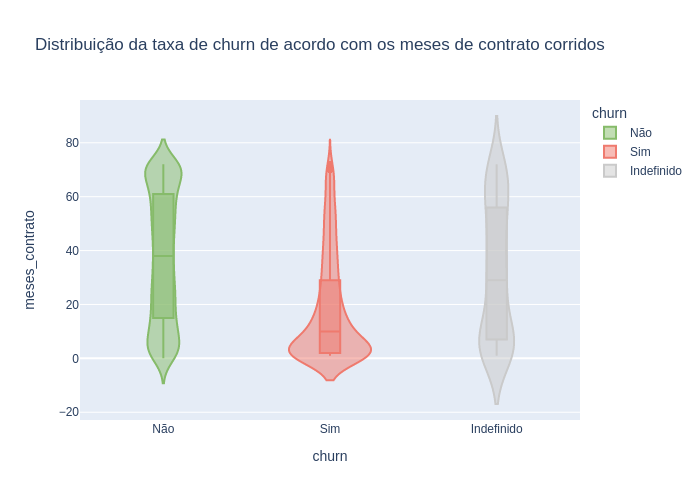

In [55]:
fig = px.violin(dados, y='meses_contrato', x='churn', box=True, color='churn', color_discrete_map=palette, hover_data=dados.columns, title='Distribuição da taxa de churn de acordo com os meses de contrato corridos')
fig.update_layout({'width':700})
fig.show('png')

In [56]:
# Analisando com maior detalhe os casos de churn e a relação com os meses de contrato
cross_churn_meses = pd.crosstab(dados.churn,dados.meses_contrato).unstack().reset_index().rename(columns={0:'count'})

fig = px.line(cross_churn_meses.query('churn=="Sim"'), x='meses_contrato', y='count', color_discrete_sequence=['red'], title='Número de casos de churn de acordo com meses de contrato corridos')
fig.update_layout({'width': 900})
fig.show()

Fica nítido que a maioria dos clientes cancelaram assinatura da **Alura Voz** já nos primeiros meses do serviço, indicando que possivelmente logo no início da relação com os clientes já houve algum tipo de falha ou baixa qualidade nos produtos/serviços disponibilizados.

Podemos detalhar ainda mais nossa análise, adicionando novas variáveis categóricas.

Text(0.5, 1.0, 'Gênero')

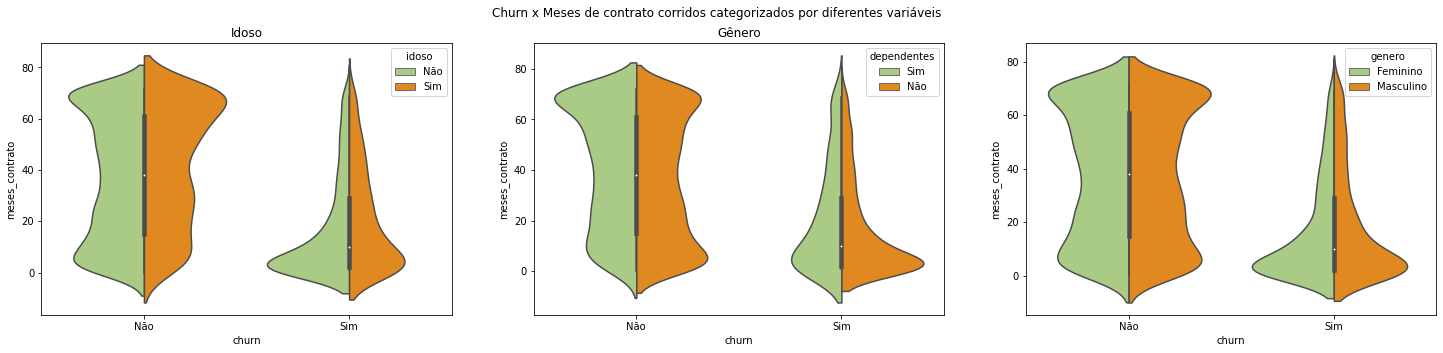

In [58]:
fig, axes = plt.subplots(1,3, figsize=(25,5))

fig.suptitle('Churn x Meses de contrato corridos categorizados por diferentes variáveis')

sns.violinplot(ax=axes[0], data=dados.query('churn in ["Sim","Não"]'),x='churn',y='meses_contrato', kind='violin',hue='idoso', split=True, palette=['#AAD67A','darkorange'])
axes[0].set_title('Idoso')

sns.violinplot(ax=axes[1], data=dados.query('churn in ["Sim","Não"]'),x='churn',y='meses_contrato', kind='violin',hue='dependentes', split=True, palette=['#AAD67A','darkorange'])
axes[1].set_title('Dependentes')

sns.violinplot(ax=axes[2], data=dados.query('churn in ["Sim","Não"]'),x='churn',y='meses_contrato', kind='violin',hue='genero', split=True, palette=['#AAD67A','darkorange'])
axes[1].set_title('Gênero')

Nesta nova análise, pode-se observar que há proporcionalmente mais clientes não idosos cancelando os serviços da Alura Voz no início dos contratos. Além disso, eles costumam não ter dependentes.

Já quanto ao gênero, pode-se dizer que a distribuição está semelhante.

Ou seja, podemos traçar um perfil genérico dos clientes que cancelaram assinatura logo nos primeiros meses de contrato: pessoas mais jovens e sem dependentes, provavelmente jovens solteiros.

### Variável `churn` vs. `cobrança_mensal`

In [59]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120]
df = dados[['cobranca_mensal']].copy()
df['cobranca_bins'] = pd.cut(dados.cobranca_mensal, bins)
group_df = df.groupby(['cobranca_bins']).agg({'cobranca_bins':'count'}).rename(columns={'cobranca_bins': 'count'}).reset_index()
group_df

,cobranca_bins,count
0,"(10, 20]",681
1,"(20, 30]",1032
2,"(30, 40]",189
3,"(40, 50]",478
4,"(50, 60]",638
5,"(60, 70]",561
6,"(70, 80]",938
7,"(80, 90]",952
8,"(90, 100]",861
9,"(100, 120]",937


[Text(0.5, 1.0, 'Gráfico de densidade de "cobranca_mensal"')]

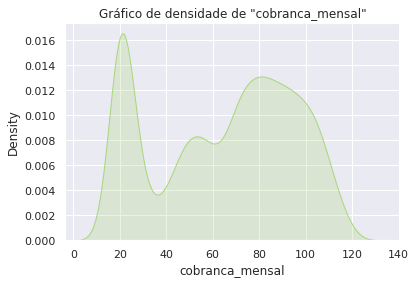

In [60]:
sns.set(style='darkgrid')
ax = sns.kdeplot(dados['cobranca_mensal'], shade=True, color='#AAD67A')
ax.set(title='Gráfico de densidade de "cobranca_mensal"')

Vemos que os valores de cobrança mensal se concentram em dois setores do gráfico de densidade. O primeiro entre os valores de $20 e $30, com um grande pico na frequência, e por fim uma concentração mais distribuída na faixa dos $60 a $100

[Text(0.5, 1.0, 'Gráfico de densidade de "cobranca_mensal" categorizado por "churn"')]

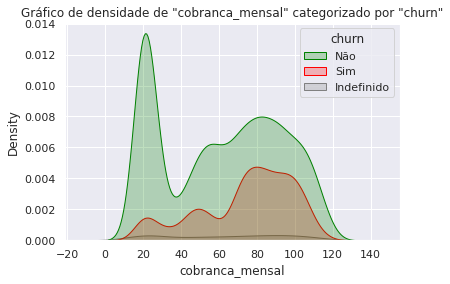

In [29]:
sns.set(style='darkgrid')
ax = sns.kdeplot(dados['cobranca_mensal'], hue=dados['churn'], shade=True, palette=palette)
ax.set(title='Gráfico de densidade de "cobranca_mensal" categorizado por "churn"')

Portanto vemos que a curva da densidade da variável `cobranca_mensal` é diferente nos casos em que ocorreu **churn**. 

Percebe-se que há uma concentração dos casos de churn em clientes com valor de cobrança mensal superior $60.

# Conclusão

Para finalizar a análise exploratória dos dados é importante realizar uma análise da correlação das variáveis do nosso dataset com `churn`. Assim, é possível embasar estatísticamente as hipóteses sugeridas anteriormente.

In [30]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(dados)
categorical_features

['id_cliente',
 'churn',
 'genero',
 'idoso',
 'parceiro',
 'dependentes',
 'servico_telefone',
 'multiplas_linhas',
 'servico_internet',
 'seguranca_online',
 'backup_online',
 'protecao_dispositivo',
 'suporte',
 'streaming_tv',
 'streaming_filmes',
 'contrato',
 'fatura_online',
 'forma_pagamento']

/home/freelancer/anaconda3/lib/python3.7/site-packages/dython/nominal.py:139: RuntimeWarning:

Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False



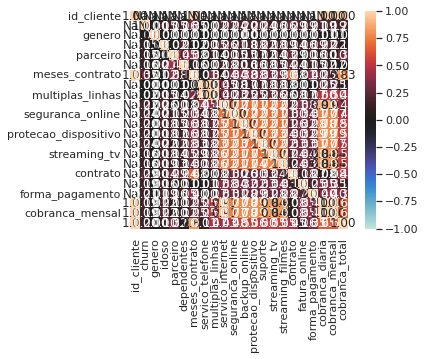

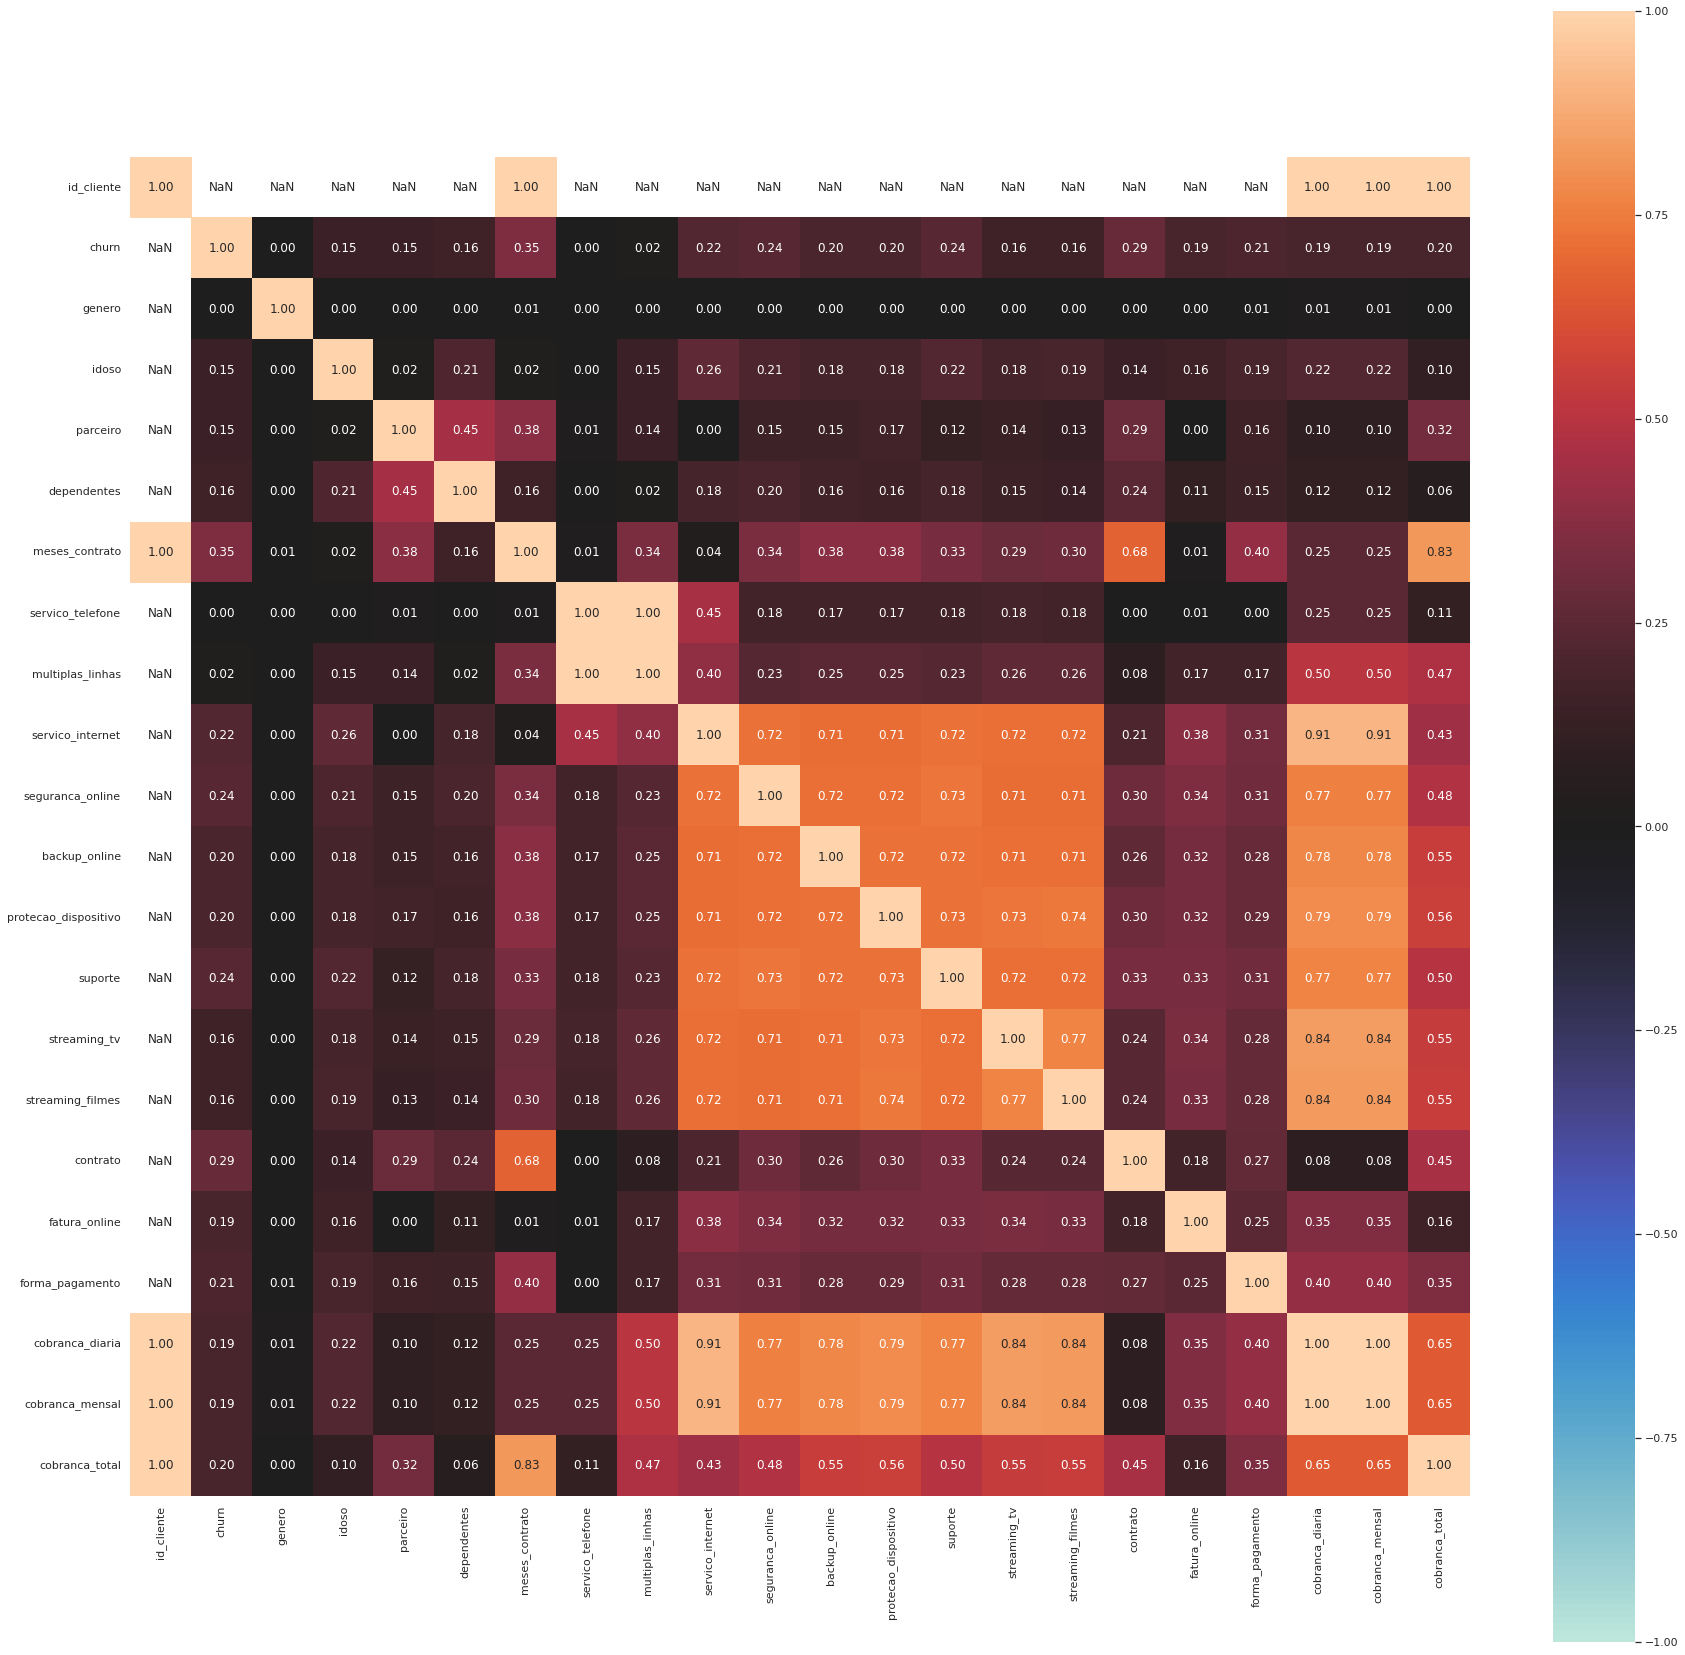

In [31]:
associations(dados, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)
complete_correlation= associations(dados, filename= 'complete_correlation.png', figsize=(30,30))

No heatmap de correlação gerado acima, foram verificadas conclusões semelhantes às observadas através dos gráficos. Variáveis como gênero não tem nenhuma relação com a taxa de churn.

Por outro lado, variáveis como `idoso` e as relacionadas aos serviços de streaming parecem ter uma leve influência no atributo `churn`. Entre as variáveis com maior correlação com `churn` estão `meses_contrato`, `contrato` e as variáveis relacionadas aos serviços adicionais ofertados pela **Alura Voz**